<a href="https://colab.research.google.com/github/Hari-R03/FINAL-PROJECT-MATERNAL-HEALTH-RISK-DETECTION/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATERNAL HEALTH RISK DETECTION

# Importing Libraries

In [1]:
#Connecting the Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
#Importing libraries for analysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Importing libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#Evaluating the model using metrics library
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
#saving the model
import pickle

# Data Uploading

In [4]:
#Calling the maternal dataset
dataset = pd.read_csv('//content/Maternal Health Risk Data Set.csv')

# Data Structures and Contents


In [5]:
#No of rows and columns
dataset.shape

(1014, 7)

In [6]:
#Atributes of Data columns in dataset
dataset.dtypes

,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


In [7]:
#Columns of Dataset
dataset.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [8]:
#Summary of Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [9]:
#Finding the null values of dataset
dataset.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [10]:
#Describing the datas of dataset
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [49]:
#Duplicate values of the dataset
dataset.duplicated()

,0
3,False
4,False
5,False
6,False
8,False
10,False
11,False
12,False
15,False
17,False


In [12]:
#Least 5 values of dataset
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [13]:
#highest 5 datas of dataset
dataset.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [14]:
dataset = dataset.fillna('')

In [15]:
#Removing the null values
dataset.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


# Data Processing

## Graph Plotting

In [16]:
#importing the mat library for graph plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors


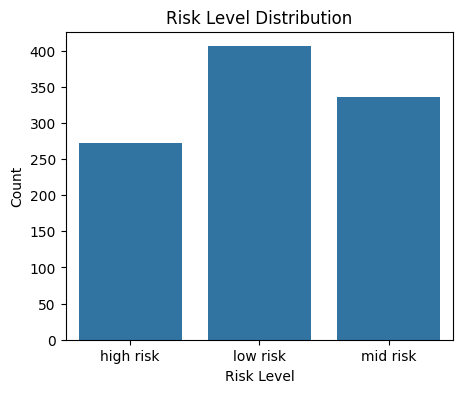

In [17]:
#Plotting Bar graph for Risklevel
plt.figure(figsize=(5,4))
sns.countplot(x='RiskLevel', data=dataset)
plt.title('Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

*From the above graph,the low risk level is higher than high risk and mid risk

*The value of low risk level is 400 count

## Exploratory Data Analysis

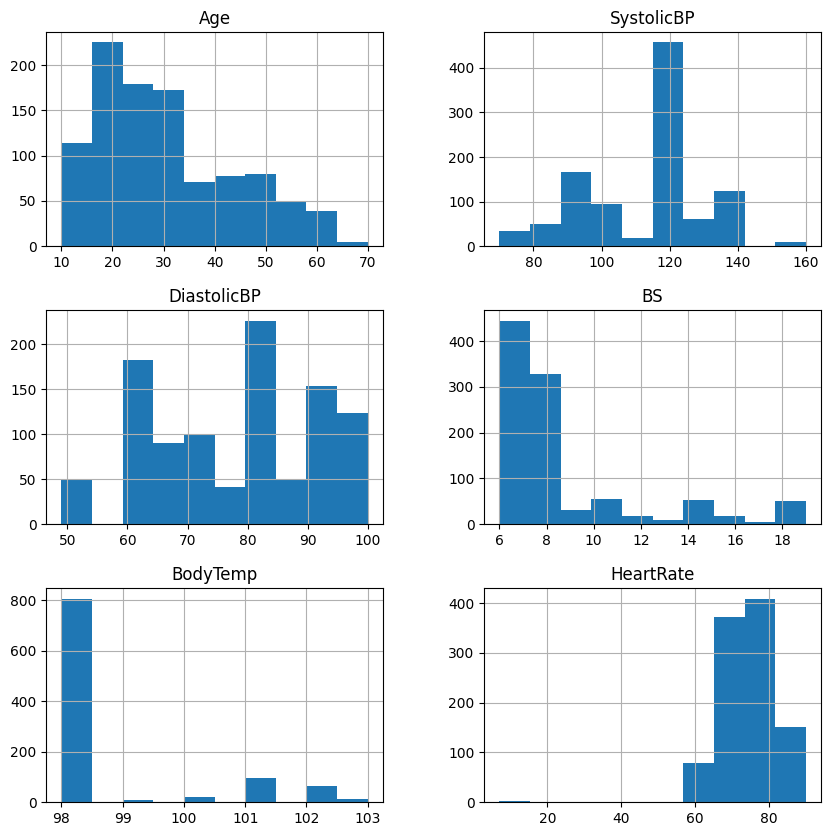

In [18]:
#Plotting Histogram for datas
dataset.hist(figsize=(10,10))
plt.show()

## Handling the missing values

In [19]:
dataset = dataset.dropna()

In [20]:
#Handling Outliers
numerical_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
Q1 = dataset[numerical_cols].quantile(0.25)
Q2 = dataset[numerical_cols].quantile(0.75)
IQR = Q2 - Q1

In [21]:
#Applying condition on outliers
outlier_condition = ~((dataset[numerical_cols] < (Q1 - 1.5 * IQR)) | (dataset[numerical_cols] > (Q2 + 1.5 * IQR))).any(axis=1)
dataset = dataset[outlier_condition]

In [22]:
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

In [23]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
3,0.179124,1.687410,0.729557,-0.279687,0.0,-0.466324,high risk
4,0.594444,0.496388,-1.165238,-1.863948,0.0,0.463325,low risk
5,-0.402325,1.687410,0.350598,-0.262084,0.0,-0.466324,high risk
6,-0.402325,1.091899,-0.407320,-0.262084,0.0,0.773208,mid risk
8,0.345252,0.496388,1.108517,-0.455716,0.0,-0.466324,mid risk


## Normal Distribution Plot

<ipython-input-24-b04f4ce9b61b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = dataset['HeartRate'],kde=True, rug=True)


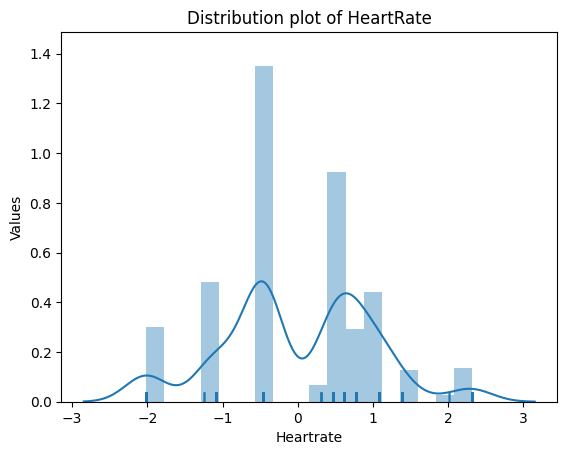

In [24]:
sns.distplot(a = dataset['HeartRate'],kde=True, rug=True)

#Giving the title for the plot
plt.title('Distribution plot of HeartRate')

#Labeling X axis
plt.xlabel('Heartrate')

#Labeling the y axis
plt.ylabel('Values')

#Display plot
plt.show()


In [25]:
q1 = np.percentile(dataset['HeartRate'],25)
q2 = np.percentile(dataset['HeartRate'],75)
iqr = q2 - q1
print(iqr,q1,q2)

1.0845905088115722 -0.46632393765953856 0.6182665711520337


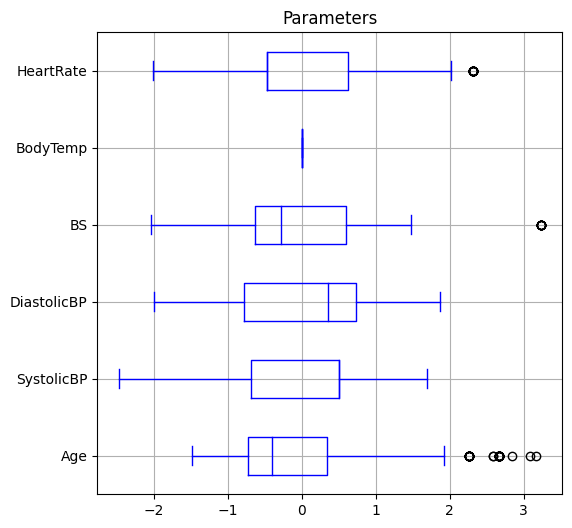

In [26]:
x = dataset.select_dtypes(include=['int64','float64'])
fig,ax = plt.subplots(figsize=(6,6))

# Use x as the data source, not as the axis
x.boxplot(ax=ax,vert=False,color='blue')
plt.title('Parameters')
plt.show()

## Correlation Heatmap

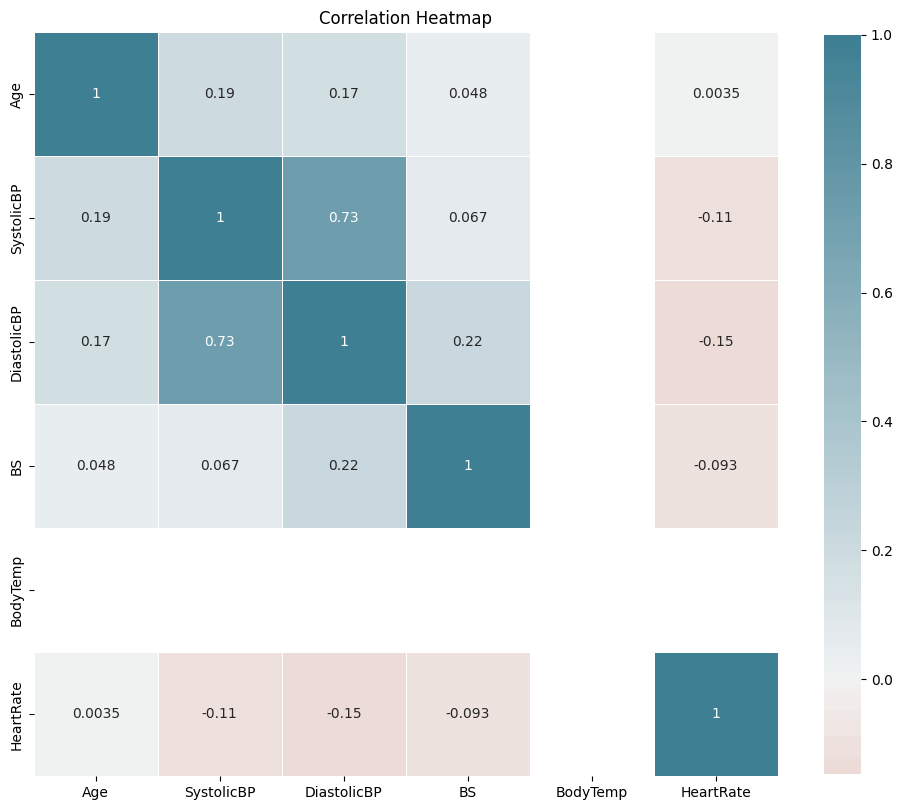

In [50]:
sublist = dataset[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']] # Remove 'RiskLevel' column
mask = np.triu(np.ones_like(sublist.corr(),dtype=bool))
fig,ax = plt.subplots(figsize=(12,12))
corr = sublist.corr() # Calculate and store the correlation matrix
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(20,220,n=200),square=True,center=0,linewidth=0.5,cbar_kws={"shrink":0.8}) # Use the calculated corr variable
plt.title('Correlation Heatmap')
plt.show()


# Feature Engineering

In [28]:
dataset['Age_SystolicBP'] = dataset['Age'] * dataset['SystolicBP']
dataset['Age_DiastolicBP'] = dataset['Age'] * dataset['DiastolicBP']

In [29]:
dataset['Age_squared'] = dataset['Age'] ** 2

In [30]:
dataset['Age_binned'] = pd.cut(dataset['Age'], bins=5, labels=False)

In [31]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_SystolicBP,Age_DiastolicBP,Age_squared,Age_binned
3,0.179124,1.687410,0.729557,-0.279687,0.0,-0.466324,high risk,0.302255,0.130681,0.032085,1
4,0.594444,0.496388,-1.165238,-1.863948,0.0,0.463325,low risk,0.295075,-0.692669,0.353363,2
5,-0.402325,1.687410,0.350598,-0.262084,0.0,-0.466324,high risk,-0.678887,-0.141054,0.161865,1
6,-0.402325,1.091899,-0.407320,-0.262084,0.0,0.773208,mid risk,-0.439298,0.163875,0.161865,1
8,0.345252,0.496388,1.108517,-0.455716,0.0,-0.466324,mid risk,0.171379,0.382717,0.119199,1


# Standardisation Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = dataset.iloc[:,:11]
y = dataset['RiskLevel']

In [33]:
# Assuming 'dataset' is the original DataFrame and 'RiskLevel' is the target variable column
x = dataset.drop('RiskLevel', axis=1)  # Remove the target variable column before scaling

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  # Scale the features
x = pd.DataFrame(x_scaled, columns=x.columns)  # Convert back to DataFrame with original column names

In [34]:
x.dtypes

,0
Age,float64
SystolicBP,float64
DiastolicBP,float64
BS,float64
BodyTemp,float64
HeartRate,float64
Age_SystolicBP,float64
Age_DiastolicBP,float64
Age_squared,float64
Age_binned,float64


In [36]:
type(x)

pandas.core.frame.DataFrame

In [37]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_SystolicBP,Age_DiastolicBP,Age_squared,Age_binned
3,0.179124,1.687410,0.729557,-0.279687,0.0,-0.466324,high risk,0.302255,0.130681,0.032085,1
4,0.594444,0.496388,-1.165238,-1.863948,0.0,0.463325,low risk,0.295075,-0.692669,0.353363,2
5,-0.402325,1.687410,0.350598,-0.262084,0.0,-0.466324,high risk,-0.678887,-0.141054,0.161865,1
6,-0.402325,1.091899,-0.407320,-0.262084,0.0,0.773208,mid risk,-0.439298,0.163875,0.161865,1
8,0.345252,0.496388,1.108517,-0.455716,0.0,-0.466324,mid risk,0.171379,0.382717,0.119199,1


# Model Building

In [38]:
# Splitting the data
X = dataset.drop('RiskLevel', axis=1)
y = dataset['RiskLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression:
               precision    recall  f1-score   support

   high risk       1.00      0.64      0.78        11
    low risk       0.58      0.95      0.72        64
    mid risk       0.67      0.16      0.26        49

    accuracy                           0.61       124
   macro avg       0.75      0.58      0.59       124
weighted avg       0.65      0.61      0.55       124

Accuracy: 0.6129032258064516


In [40]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Support Vector Classifier:\n", classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

Support Vector Classifier:
               precision    recall  f1-score   support

   high risk       1.00      0.64      0.78        11
    low risk       0.59      0.97      0.73        64
    mid risk       0.67      0.16      0.26        49

    accuracy                           0.62       124
   macro avg       0.75      0.59      0.59       124
weighted avg       0.66      0.62      0.55       124

Accuracy: 0.6209677419354839


# Model Evaluation and Selection

In [41]:
# Compare models based on accuracy or other metrics
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_logreg = grid_search.best_estimator_
# Evaluate the fine-tuned model
y_pred_logreg = best_logreg.predict(X_test)
print("Best Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Best Logistic Regression:
               precision    recall  f1-score   support

   high risk       1.00      0.45      0.62        11
    low risk       0.58      0.94      0.71        64
    mid risk       0.53      0.16      0.25        49

    accuracy                           0.59       124
   macro avg       0.70      0.52      0.53       124
weighted avg       0.60      0.59      0.52       124

Accuracy: 0.5887096774193549


# Saving the Model

In [43]:
import pickle
from sklearn.linear_model import LogisticRegression

In [44]:
tfp = "Maternal_Health_Risk_Detection.sav"
pickle.dump(best_logreg, open(tfp, 'wb'))  # Save the model